# Phase Classification
## Dense networks

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

In [22]:
def evaluate_model(build_model, x_train, y_train, x_test, y_test):
    epoch_convergence = []
    train_loss = []
    train_accuracy = []
    test_loss = []
    test_accuracy = []

    model_history_of_last_run = []

    # build and train model
    for i in range(5):
        model = build_model()

        model_history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=0,
          validation_data=(x_test, y_test))

        # Report model summary once
        if i == 0:
            model.summary()

        epoch_number_after_train_accuracy_convergence = find_stable_epoch(model_history, 'accuracy')
        epoch_number_after_test_accuracy_convergence = find_stable_epoch(model_history, 'val_accuracy')

        epoch_number_after_model_convergence = max(epoch_number_after_train_accuracy_convergence, epoch_number_after_test_accuracy_convergence)

        # evaluate model
        score = model.evaluate(x_test, y_test, verbose=0)

        # Append data
        epoch_convergence.append(epoch_number_after_model_convergence)
        train_loss.append(model_history.history['loss'][-1])
        train_accuracy.append(model_history.history['accuracy'][-1])
        test_loss.append(score[0])
        test_accuracy.append(score[1])

        # Save a sample of the training history
        if i == 4:
            model_history_of_last_run = model_history

    average_epoch_after_convergence = np.average(epoch_convergence)
    average_loss_train = np.average(train_loss)
    average_accuracy_train = np.average(train_accuracy)
    average_loss_test = np.average(test_loss)
    average_accuracy_test = np.average(test_accuracy)

    return ({'Average epoch after convergence': average_epoch_after_convergence,
            'Average training loss': average_loss_train,
            'Average training accuracy': average_accuracy_train,
            'Average test loss': average_loss_test,
            'Average test accuracy': average_accuracy_test}, model_history_of_last_run)

def find_stable_epoch(model_history, identifier):
    identical_accuracy_count = 0
    last_accuracy_value = 0
    stable_epoch_number = 0
    for index, accuracy in enumerate(model_history.history[identifier]):
        if last_accuracy_value == accuracy:
            identical_accuracy_count += 1
        if identical_accuracy_count == 4:
            stable_epoch_number = index + 1
            break
        last_accuracy_value = accuracy

    if stable_epoch_number == 0:
        stable_epoch_number = -1

    return stable_epoch_number

def visualize_training(model_history, model_name):

    # visualize history for accuracy
    plt.plot(model_history.history['accuracy'])
    plt.plot(model_history.history['val_accuracy'])
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.title('Accuracy of {model_name} w.r.t. training epochs'.format(model_name=model_name))
    plt.show()
    # visualize history for loss
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.title('Loss of {model_name} w.r.t. training epochs'.format(model_name=model_name))
    plt.show()

def report_and_visualize_model_performance(build_model, x_train, y_train, x_test, y_test, model_name):
    performance_report, model_history_sample = evaluate_model(build_model, x_train, y_train, x_test, y_test)
    visualize_training(model_history_sample, model_name)
    print(json.dumps(performance_report, indent=2))

In [3]:
# Load datasets
x_train = np.load("x_train.npy")
x_test = np.load("x_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")
x_train_reduced = np.load("x_train_reduced.npy")
x_test_reduced = np.load("x_test_reduced.npy")

Model: "Dense_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  204928    
_________________________________________________________________
dense_1 (Dense)              multiple                  129       
Total params: 205,057
Trainable params: 205,057
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 8.6,
  "Average training loss": 0.001917629805393517,
  "Average training accuracy": 1.0,
  "Average test loss": 0.0021055630408227445,
  "Average test accuracy": 0.9999724388122558
}


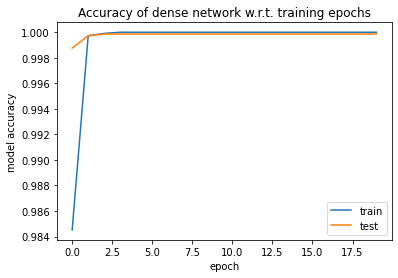

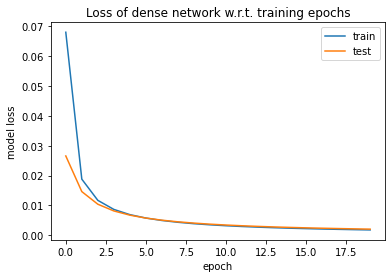

In [4]:
# First attempt using a single hidden dense layer

def build_model_1():
    model = Sequential(name='Dense_network')
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='sgd', metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_1, x_train, y_train, x_test, y_test, 'dense network')

Model: "Dense_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          multiple                  0         
_________________________________________________________________
dense_10 (Dense)             multiple                  204928    
_________________________________________________________________
dense_11 (Dense)             multiple                  129       
Total params: 205,057
Trainable params: 205,057
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 6.8,
  "Average training loss": 2.4547153952880762e-05,
  "Average training accuracy": 1.0,
  "Average test loss": 0.00015880790451774373,
  "Average test accuracy": 1.0
}


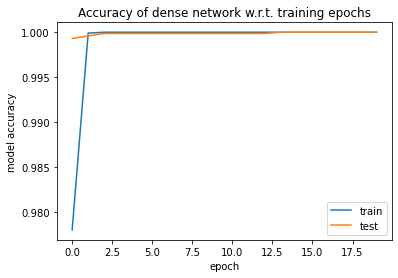

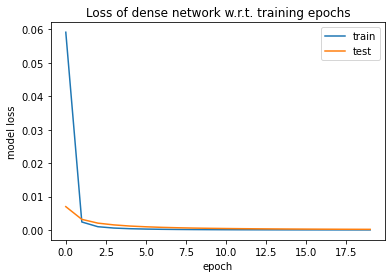

In [5]:
# Second attempt using ADAM optimizer
def build_model_2():
    model = Sequential(name='Dense_network')
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_2, x_train, y_train, x_test, y_test, 'dense network')

Model: "Dense_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         multiple                  0         
_________________________________________________________________
dense_20 (Dense)             multiple                  102464    
_________________________________________________________________
dense_21 (Dense)             multiple                  65        
Total params: 102,529
Trainable params: 102,529
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 6.6,
  "Average training loss": 4.5988749479874966e-05,
  "Average training accuracy": 1.0,
  "Average test loss": 0.000305370194837451,
  "Average test accuracy": 1.0
}


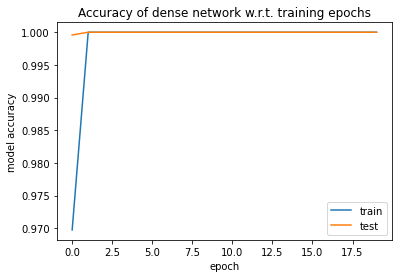

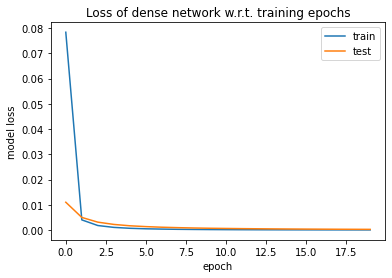

In [6]:
# Third attempt using fewer hidden units
def build_model_3():
    model = Sequential(name='Dense_network')
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_3, x_train, y_train, x_test, y_test, 'dense network')


Model: "Dense_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         multiple                  0         
_________________________________________________________________
dense_30 (Dense)             multiple                  102464    
_________________________________________________________________
dense_31 (Dense)             multiple                  65        
Total params: 102,529
Trainable params: 102,529
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 15.8,
  "Average training loss": 2.0002636214044855e-09,
  "Average training accuracy": 1.0,
  "Average test loss": 6.568799858541752e-06,
  "Average test accuracy": 1.0
}


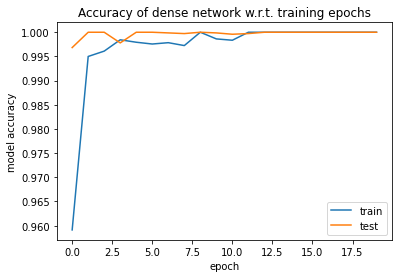

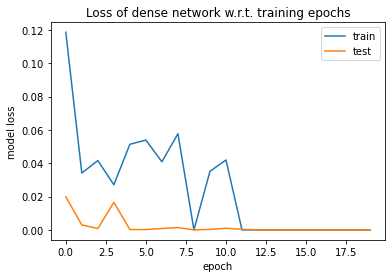

In [7]:
# Fourth attempt using RMSProp
def build_model_4():
    model = Sequential(name='Dense_network')
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_4, x_train, y_train, x_test, y_test, 'dense network')

Model: "Dense_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         multiple                  0         
_________________________________________________________________
dense_40 (Dense)             multiple                  102464    
_________________________________________________________________
dense_41 (Dense)             multiple                  65        
Total params: 102,529
Trainable params: 102,529
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 3.0,
  "Average training loss": 0.16497353836894035,
  "Average training accuracy": 0.9212714076042176,
  "Average test loss": 0.16841506510972976,
  "Average test accuracy": 0.9181041598320008
}


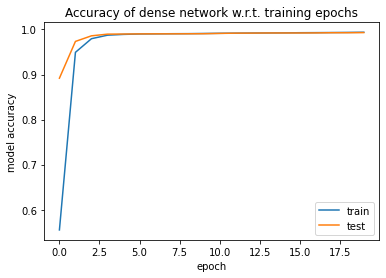

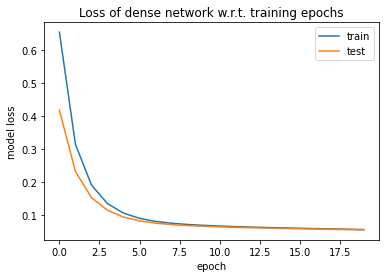

In [8]:
# Fifth attempt using Adadelta
def build_model_5():
    model = Sequential(name='Dense_network')
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adadelta', metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_5, x_train, y_train, x_test, y_test, 'dense network')


Model: "Dense_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_25 (Flatten)         multiple                  0         
_________________________________________________________________
dense_50 (Dense)             multiple                  102464    
_________________________________________________________________
dense_51 (Dense)             multiple                  65        
Total params: 102,529
Trainable params: 102,529
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 15.2,
  "Average training loss": 0.011745060607790948,
  "Average training accuracy": 1.0,
  "Average test loss": 0.019169318303465844,
  "Average test accuracy": 0.9998897671699524
}


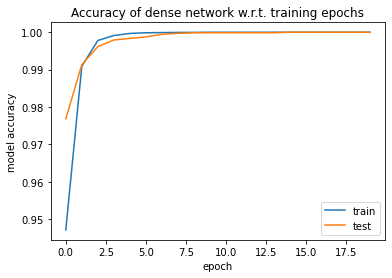

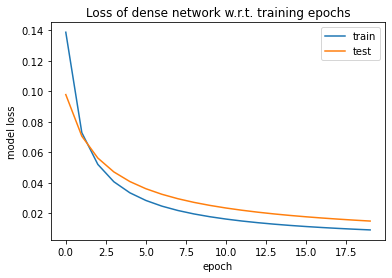

In [9]:
# Sixth attempt using Adagrad
def build_model_6():
    model = Sequential(name='Dense_network')
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adagrad', metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_6, x_train, y_train, x_test, y_test, 'dense network')

Model: "Dense_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_30 (Flatten)         multiple                  0         
_________________________________________________________________
dense_60 (Dense)             multiple                  102464    
_________________________________________________________________
dense_61 (Dense)             multiple                  65        
Total params: 102,529
Trainable params: 102,529
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 6.6,
  "Average training loss": 4.5732777653029186e-05,
  "Average training accuracy": 1.0,
  "Average test loss": 0.0003884246398229152,
  "Average test accuracy": 0.9999724388122558
}


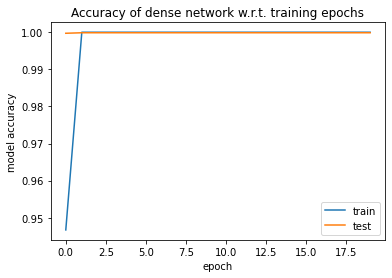

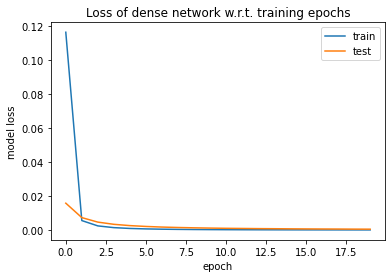

In [10]:
# Seventh attempt using Adamax
def build_model_7():
    model = Sequential(name='Dense_network')
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_7, x_train, y_train, x_test, y_test, 'dense network')

Model: "Dense_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_35 (Flatten)         multiple                  0         
_________________________________________________________________
dense_70 (Dense)             multiple                  102464    
_________________________________________________________________
dense_71 (Dense)             multiple                  65        
Total params: 102,529
Trainable params: 102,529
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 6.6,
  "Average training loss": 4.67207188194152e-05,
  "Average training accuracy": 1.0,
  "Average test loss": 0.0003416389867197722,
  "Average test accuracy": 1.0
}


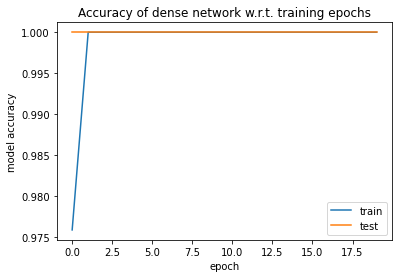

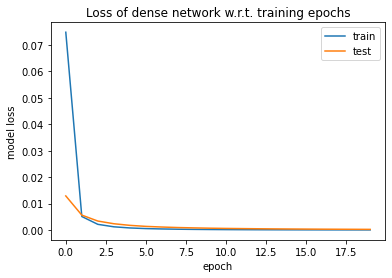

In [11]:
# Eighth attempt using Nadam
def build_model_8():
    model = Sequential(name='Dense_network')
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_8, x_train, y_train, x_test, y_test, 'dense network')

Model: "Dense_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_40 (Flatten)         multiple                  0         
_________________________________________________________________
dense_80 (Dense)             multiple                  102464    
_________________________________________________________________
dense_81 (Dense)             multiple                  65        
Total params: 102,529
Trainable params: 102,529
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 7.0,
  "Average training loss": 4.080983562744222e-05,
  "Average training accuracy": 1.0,
  "Average test loss": 0.00024057066766545177,
  "Average test accuracy": 1.0
}


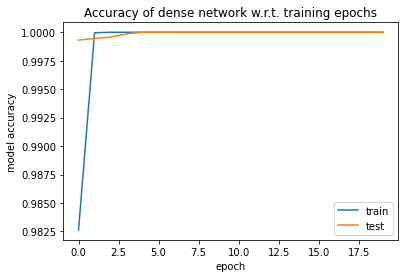

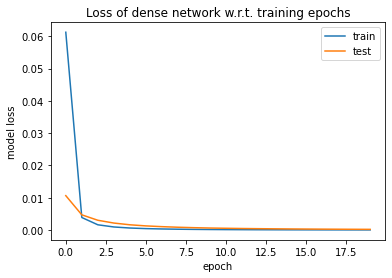

In [12]:
# Ninth attempt using Ftrl
def build_model_9():
    model = Sequential(name='Dense_network')
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_9, x_train, y_train, x_test, y_test, 'dense network')

Model: "Dense_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_45 (Flatten)         multiple                  0         
_________________________________________________________________
dense_90 (Dense)             multiple                  102464    
_________________________________________________________________
dense_91 (Dense)             multiple                  65        
Total params: 102,529
Trainable params: 102,529
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 13.2,
  "Average training loss": 2.5609212389099412e-05,
  "Average training accuracy": 1.0,
  "Average test loss": 0.0021797579480335116,
  "Average test accuracy": 0.9993937611579895
}


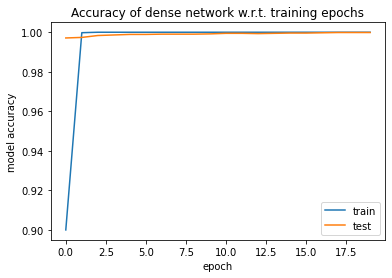

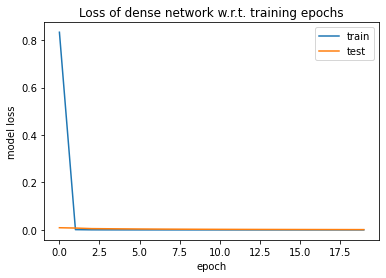

In [13]:
# Attempt number 10 using bigger learning rate
def build_model_10():
    model = Sequential(name='Dense_network')
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_10, x_train, y_train, x_test, y_test, 'dense network')

## Training with the dataset with reduced dimensions

Model: "Dense_network_reduced_input"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            multiple                  1344      
_________________________________________________________________
dense_101 (Dense)            multiple                  65        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 13.0,
  "Average training loss": 0.00492368321865797,
  "Average training accuracy": 0.9997152090072632,
  "Average test loss": 0.00623413622379303,
  "Average test accuracy": 0.9995591044425964
}


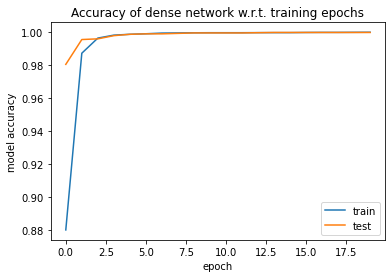

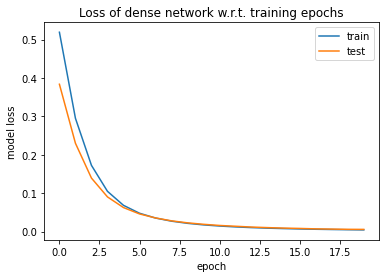

In [14]:
# First attempt using a single hidden dense layer with the reduced dimensions
def build_model_for_reduced_data_1():
    model= Sequential(name='Dense_network_reduced_input')
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_for_reduced_data_1, x_train_reduced, y_train, x_test_reduced, y_test, 'dense network')

Model: "Dense_network_reduced_input"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            multiple                  2688      
_________________________________________________________________
dense_111 (Dense)            multiple                  129       
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 17.6,
  "Average training loss": 0.0025324932299554347,
  "Average training accuracy": 0.9998254537582397,
  "Average test loss": 0.0033649531193077563,
  "Average test accuracy": 0.9996693134307861
}


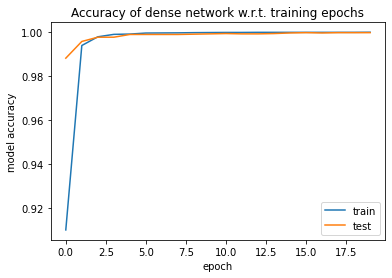

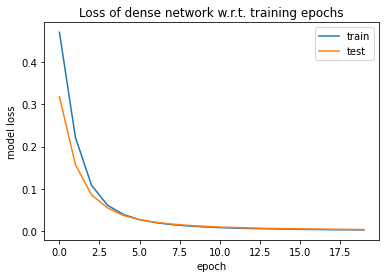

In [15]:
# Second attempt with more hidden units
def build_model_for_reduced_data_2():
    model = Sequential(name='Dense_network_reduced_input')
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_for_reduced_data_2, x_train_reduced, y_train, x_test_reduced, y_test, 'dense network')

Model: "Dense_network_reduced_input"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            multiple                  1344      
_________________________________________________________________
dense_121 (Dense)            multiple                  4160      
_________________________________________________________________
dense_122 (Dense)            multiple                  65        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 17.4,
  "Average training loss": 0.00022673807106912136,
  "Average training accuracy": 1.0,
  "Average test loss": 0.0008931032032705843,
  "Average test accuracy": 0.9997519850730896
}


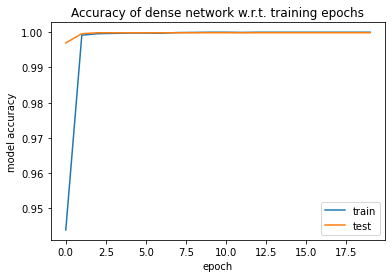

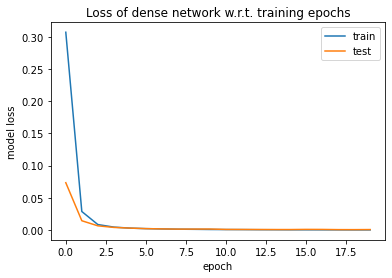

In [16]:
# Third attempt with additional hidden layer
def build_model_for_reduced_data_3():
    model = Sequential(name='Dense_network_reduced_input')
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_for_reduced_data_3, x_train_reduced, y_train, x_test_reduced, y_test, 'dense network')

Model: "Dense_network_reduced_input"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            multiple                  1344      
_________________________________________________________________
dense_136 (Dense)            multiple                  8320      
_________________________________________________________________
dense_137 (Dense)            multiple                  129       
Total params: 9,793
Trainable params: 9,793
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 15.4,
  "Average training loss": 0.00016210352478083224,
  "Average training accuracy": 1.0,
  "Average test loss": 0.0012128669884987175,
  "Average test accuracy": 0.9996968746185303
}


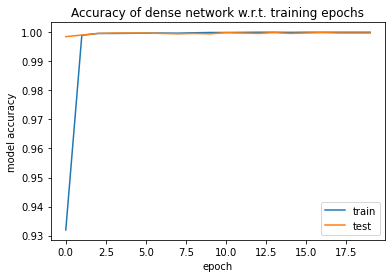

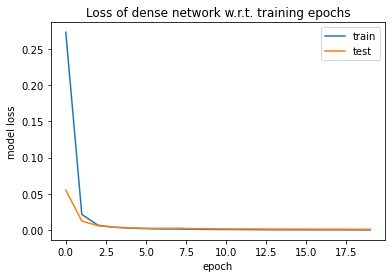

In [17]:
# Fourth attempt with more hidden units in second hidden layer
def build_model_for_reduced_data_4():
    model = Sequential(name='Dense_network_reduced_input')
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_for_reduced_data_4, x_train_reduced, y_train, x_test_reduced, y_test, 'dense network')

Model: "Dense_network_reduced_input"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            multiple                  1344      
_________________________________________________________________
dense_151 (Dense)            multiple                  4160      
_________________________________________________________________
dense_152 (Dense)            multiple                  65        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 15.8,
  "Average training loss": 3.4034389045700663e-06,
  "Average training accuracy": 1.0,
  "Average test loss": 0.0014207076630555094,
  "Average test accuracy": 0.9995591163635253
}


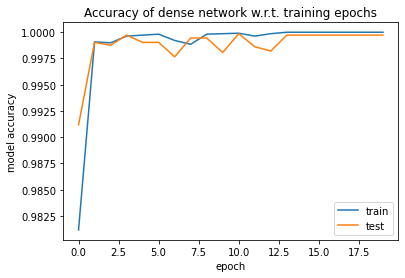

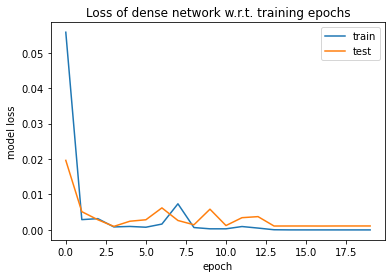

In [18]:
# Fifth attempt with higher learning rate
def build_model_for_reduced_data_5():
    model = Sequential(name='Dense_network_reduced_input')
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_model_for_reduced_data_5, x_train_reduced, y_train, x_test_reduced, y_test, 'dense network')

## Save best performing models

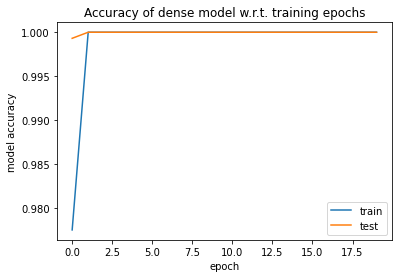

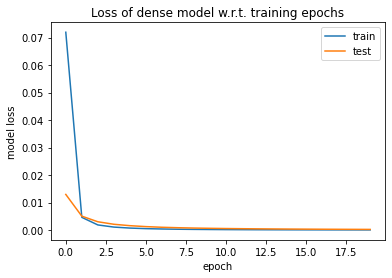

In [23]:
dense_model = build_model_3()
history = dense_model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=0, validation_data=(x_test, y_test))
visualize_training(history, 'dense model')
dense_model.save("dense_model.h5")
dense_model.save_weights("final_weights_dense_model.h5")

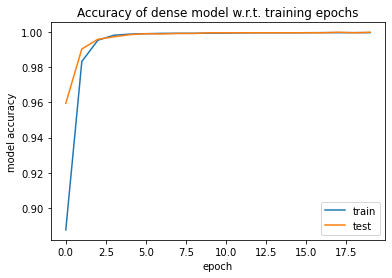

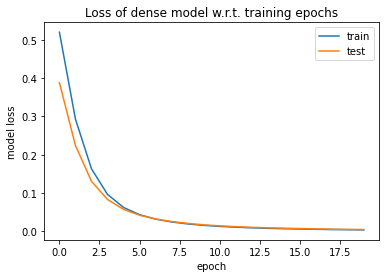

In [24]:
model_with_reduced_data = build_model_for_reduced_data_1()
history = model_with_reduced_data.fit(x_train_reduced, y_train, batch_size=128, epochs=20, verbose=0, validation_data=(x_test_reduced, y_test))
visualize_training(history, 'dense model')
model_with_reduced_data.save("model_reduced_dimension_data.h5")
model_with_reduced_data.save_weights("final_weights_model_reduced_dimension_data.h5")